In [1]:
import pandas as pd
import os

import statsmodels.api as sm
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
file_path=os.path.join(os.getcwd(),"Transformed_data","EDA.csv")

df = pd.read_csv(file_path)

In [3]:
df=df.drop(columns=["Customer_Location","Location"])

In [4]:
df.head()

,Artist_Reputation,Weight,Material,Price_Of_Sculpture,Base_Shipping_Price,International,Express_Shipment,Installation_Included,Transport,Fragile,Customer_Information,Cost
0,Low_Reputation,4128.000000,Brass,13.91,16.27,Yes,Yes,No,Airways,No,Working Class,-283.29
1,Low_Reputation,61.000000,Brass,6.83,15.00,No,No,No,Roadways,No,Working Class,-159.96
2,Low_Reputation,237.000000,Clay,4.96,21.18,No,No,No,Roadways,Yes,Working Class,-154.29
3,Low_Reputation,1312.229333,Aluminium,5.81,16.31,No,No,No,Roadways,No,Wealthy,-161.16
4,Low_Reputation,324.000000,Aluminium,3.18,11.94,Yes,Yes,Yes,Airways,No,Working Class,-159.23


In [5]:
df.head()

,Artist_Reputation,Weight,Material,Price_Of_Sculpture,Base_Shipping_Price,International,Express_Shipment,Installation_Included,Transport,Fragile,Customer_Information,Cost
0,Low_Reputation,4128.000000,Brass,13.91,16.27,Yes,Yes,No,Airways,No,Working Class,-283.29
1,Low_Reputation,61.000000,Brass,6.83,15.00,No,No,No,Roadways,No,Working Class,-159.96
2,Low_Reputation,237.000000,Clay,4.96,21.18,No,No,No,Roadways,Yes,Working Class,-154.29
3,Low_Reputation,1312.229333,Aluminium,5.81,16.31,No,No,No,Roadways,No,Wealthy,-161.16
4,Low_Reputation,324.000000,Aluminium,3.18,11.94,Yes,Yes,Yes,Airways,No,Working Class,-159.23


#### Train Test Split


In [6]:
from sklearn.model_selection import train_test_split
import numpy as np

# Assuming X is your feature matrix and y is your target variable
X = df.drop('Cost', axis=1)  # Features (excluding the target column)
y = np.log(df['Cost'].abs())  # Target variable

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.15, random_state=42)

# Check the shapes of the resulting sets
print("Training set - X shape:", X_train.shape)
print("Training set - y shape:", y_train.shape)
print("Testing set - X shape:", X_test.shape)
print("Testing set - y shape:", y_test.shape)

Training set - X shape: (3573, 11)
Training set - y shape: (3573,)
Testing set - X shape: (631, 11)
Testing set - y shape: (631,)


#### Data Distribution

In [7]:
def split_numerical_categorical_labels(df):
    """
    Identify and return labels of numerical and categorical columns in a DataFrame.

    Parameters:
    - df: pandas DataFrame

    Returns:
    - numerical_labels: List of labels for numerical columns
    - categorical_labels: List of labels for categorical columns
    """
    # Identify numerical columns
    numerical_labels = list(df.select_dtypes(include=['number']).columns)

    # Identify categorical columns
    categorical_labels = list(df.select_dtypes(include=['object', 'category']).columns)

    return numerical_labels, categorical_labels


numerical_labels, categorical_labels = split_numerical_categorical_labels(df=X_train)

In [8]:
numerical_labels

['Weight', 'Price_Of_Sculpture', 'Base_Shipping_Price']

In [9]:
categorical_labels

['Artist_Reputation',
 'Material',
 'International',
 'Express_Shipment',
 'Installation_Included',
 'Transport',
 'Fragile',
 'Customer_Information']

In [10]:
y_train

3390    7.078198
3912    6.758431
139     5.569069
3756    5.464171
266     5.926793
          ...   
3444    5.177392
466     6.179727
3092    5.054397
3772    4.623108
860     6.282005
Name: Cost, Length: 3573, dtype: float64

In [11]:
categorical_labels

['Artist_Reputation',
 'Material',
 'International',
 'Express_Shipment',
 'Installation_Included',
 'Transport',
 'Fragile',
 'Customer_Information']

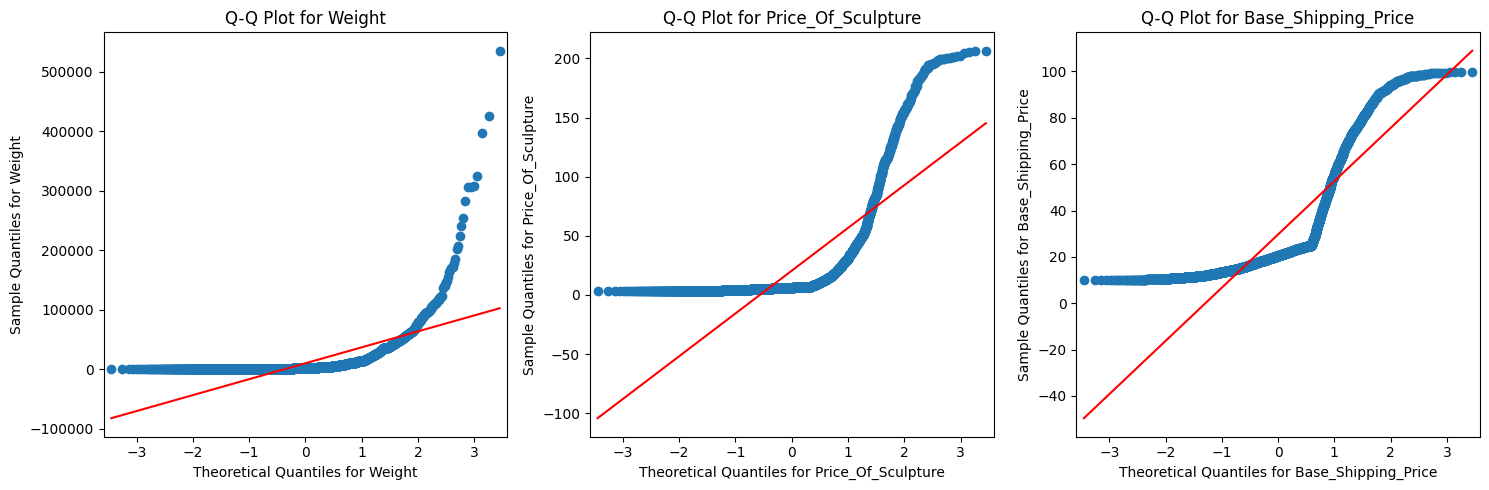

In [12]:
def plot_qq_plots(dataframe, column_labels, plots_per_row=3):
    # Check if the columns exist in the DataFrame
    for label in column_labels:
        if label not in dataframe.columns:
            raise ValueError(f"Column '{label}' not found in the DataFrame.")

    # Calculate the number of rows needed
    num_columns = len(column_labels)
    num_rows = (num_columns + plots_per_row - 1) // plots_per_row

    # Create Q-Q plots
    fig, axes = plt.subplots(num_rows, plots_per_row, figsize=(15, 5 * num_rows))

    for i, label in enumerate(column_labels):
        row_idx = i // plots_per_row
        col_idx = i % plots_per_row

        ax = axes[row_idx, col_idx] if num_rows > 1 else axes[col_idx]
        sm.qqplot(dataframe[label], line='s', ax=ax)
        ax.set_xlabel(f'Theoretical Quantiles for {label}')
        ax.set_ylabel(f'Sample Quantiles for {label}')
        ax.set_title(f'Q-Q Plot for {label}')

    # Adjust layout to prevent clipping of titles
    plt.tight_layout()
    plt.show()

plot_qq_plots(dataframe=X_train, column_labels=numerical_labels)

In [13]:
import numpy as np

# Base 2 logarithm transform the specified numerical columns
X_train[numerical_labels] = np.log2(X_train[numerical_labels] + 1)  # Adding 1 to handle zero values # Adding 1 to handle zero values
X_test[numerical_labels] = np.log2(X_test[numerical_labels] + 1)

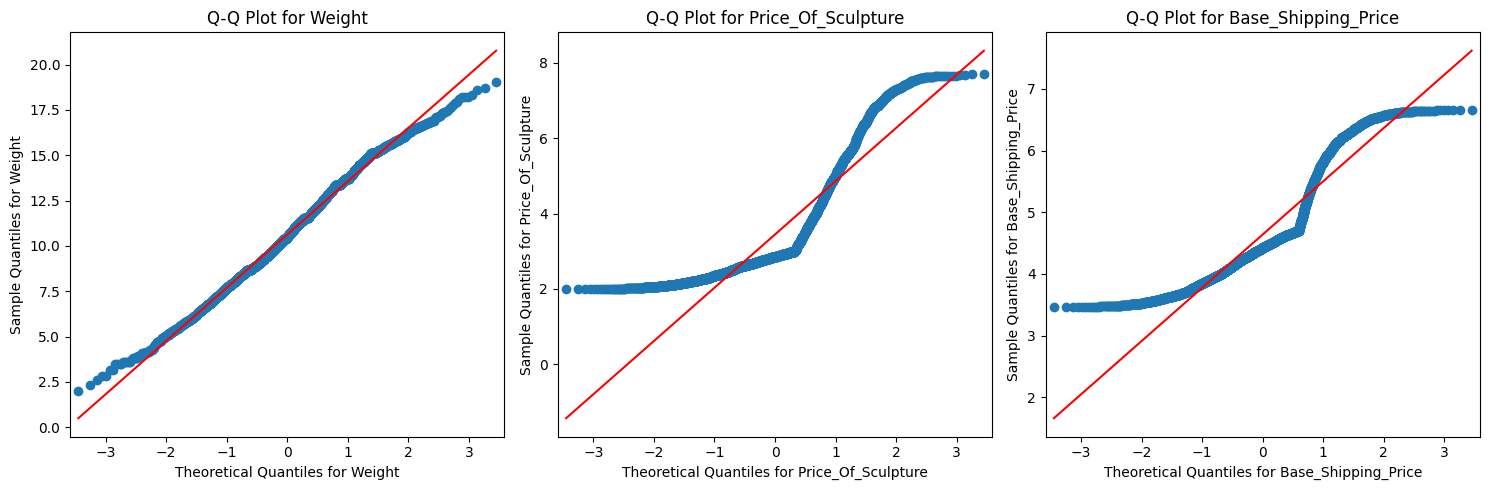

In [14]:
plot_qq_plots(dataframe=X_train, column_labels=numerical_labels)

In [15]:
X_train[categorical_labels]

,Artist_Reputation,Material,International,Express_Shipment,Installation_Included,Transport,Fragile,Customer_Information
3390,High_Reputation,Aluminium,No,Yes,No,Roadways,No,Wealthy
3912,Moderate_Reputation,Brass,No,No,No,Roadways,No,Working Class
139,Moderate_Reputation,Wood,No,Yes,No,Roadways,No,Working Class
3756,Low_Reputation,Bronze,No,No,Yes,Roadways,No,Working Class
266,High_Reputation,Stone,Yes,Yes,No,Airways,No,Working Class
...,...,...,...,...,...,...,...,...
3444,Low_Reputation,Wood,No,No,Yes,Roadways,No,Working Class
466,Moderate_Reputation,Aluminium,Yes,No,Yes,Airways,No,Working Class
3092,Low_Reputation,Aluminium,No,No,No,Roadways,No,Wealthy
3772,Low_Reputation,Aluminium,No,No,No,Roadways,No,Working Class


In [16]:
def print_unique_counts(dataframe, column_labels):
    for label in column_labels:
        unique_counts = dataframe[label].nunique()
        print(f"Unique count for column '{label}': {unique_counts}")


# Call the function with your DataFrame and column labels
print_unique_counts(dataframe=X_train, column_labels=categorical_labels)

Unique count for column 'Artist_Reputation': 4
Unique count for column 'Material': 7
Unique count for column 'International': 2
Unique count for column 'Express_Shipment': 2
Unique count for column 'Installation_Included': 2
Unique count for column 'Transport': 3
Unique count for column 'Fragile': 2
Unique count for column 'Customer_Information': 2


In [17]:
categorical_labels

['Artist_Reputation',
 'Material',
 'International',
 'Express_Shipment',
 'Installation_Included',
 'Transport',
 'Fragile',
 'Customer_Information']

In [18]:
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder

def one_hot_encode(X_train, X_test, categorical_columns):
    # Create a column transformer with OneHotEncoder
    preprocessor = ColumnTransformer(
        transformers=[
            ('onehot', OneHotEncoder(), categorical_columns)
        ],
        remainder='passthrough'  # Pass through any non-categorical columns unchanged
    )

    # Create a pipeline with the preprocessor
    pipeline = Pipeline([
        ('preprocessor', preprocessor),
        # Add more steps here if needed
    ])

    # Fit and transform on the training data
    X_train_encoded_array = pipeline.fit_transform(X_train)

    # Transform the test data
    X_test_encoded_array = pipeline.transform(X_test)

    # Get the names of the new columns after one-hot encoding
    new_columns = preprocessor.get_feature_names_out()

    # Convert the transformed arrays back to DataFrames
    X_train_encoded = pd.DataFrame(X_train_encoded_array, columns=new_columns)
    X_test_encoded = pd.DataFrame(X_test_encoded_array, columns=new_columns)

    return X_train_encoded, X_test_encoded



X_train, X_test = one_hot_encode(X_train, X_test, categorical_columns=categorical_labels)


In [19]:
X_train

,onehot__Artist_Reputation_High_Reputation,onehot__Artist_Reputation_Low_Reputation,onehot__Artist_Reputation_Moderate_Reputation,onehot__Artist_Reputation_Very_High_Reputation,onehot__Material_Aluminium,onehot__Material_Brass,onehot__Material_Bronze,onehot__Material_Clay,onehot__Material_Marble,onehot__Material_Stone,...,onehot__Transport_Airways,onehot__Transport_Roadways,onehot__Transport_Waterways,onehot__Fragile_No,onehot__Fragile_Yes,onehot__Customer_Information_Wealthy,onehot__Customer_Information_Working Class,remainder__Weight,remainder__Price_Of_Sculpture,remainder__Base_Shipping_Price
0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,1.0,0.0,1.0,0.0,10.733863,3.922198,4.670161
1,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,1.0,0.0,0.0,1.0,12.890074,4.636915,6.638798
2,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,1.0,0.0,0.0,1.0,6.169925,2.845992,4.605850
3,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,1.0,0.0,1.0,0.0,0.0,1.0,11.450180,2.289834,4.689299
4,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,1.0,0.0,0.0,1.0,0.0,0.0,1.0,11.974056,4.879706,3.749534
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3568,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,1.0,0.0,0.0,1.0,8.447083,2.615887,4.530445
3569,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,1.0,0.0,0.0,1.0,9.840778,2.893362,4.441616
3570,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,1.0,0.0,1.0,0.0,5.392317,2.662205,4.258519
3571,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,1.0,0.0,0.0,1.0,7.149747,2.634593,3.782409


In [20]:
pip install xgboost

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip available: 22.3 -> 23.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [21]:
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.ensemble import GradientBoostingRegressor, AdaBoostRegressor, RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
from xgboost import XGBRegressor
import pandas as pd

class RegressionModels:
    def __init__(self):
        self.models = {
            'Linear Regression': LinearRegression(),
            'Ridge Regression': Ridge(),
            'Lasso Regression': Lasso(),
            'Gradient Boosting': GradientBoostingRegressor(),
            'AdaBoost': AdaBoostRegressor(),
            'Decision Tree': DecisionTreeRegressor(),
            'Random Forest': RandomForestRegressor(),
            'KNeighbors': KNeighborsRegressor(),
            'XGBoost': XGBRegressor()  # Add XGBoost to the models
        }
        self.trained_models = {}

    def train_models(self, X_train, y_train):
        for model_name, model in self.models.items():
            if 'Regression' in model_name:
                # For linear regression models, use standard scaling
                pipeline = make_pipeline(StandardScaler(), model)
            else:
                # For other models, no need for scaling
                pipeline = model
            pipeline.fit(X_train, y_train)
            self.trained_models[model_name] = pipeline

    def predict_models(self, X_test):
        predictions = {}
        for model_name, model in self.trained_models.items():
            predictions[model_name] = model.predict(X_test)
        return predictions

    def evaluate_models(self, y_true, predictions):
        evaluations = {}
        for model_name, y_pred in predictions.items():
            mse = mean_squared_error(y_true, y_pred)
            r2 = r2_score(y_true, y_pred)
            evaluations[model_name] = {'Mean Squared Error': mse, 'R2 Score': r2}
        return evaluations

# Assuming you have X_train, y_train, and X_test defined elsewhere
# Create an instance of the RegressionModels class
regression_models = RegressionModels()

# Train the models on the training data
regression_models.train_models(X_train, y_train)

# Predict using the trained models on the test data
predictions = regression_models.predict_models(X_test)

# Evaluate the models on the test data
evaluations = regression_models.evaluate_models(y_test, predictions)

# Create a list of dictionaries to store the data
data_list = []

# Populate the list with evaluation results
for model_name, metrics in evaluations.items():
    data_list.append({
        'Model Name': model_name,
        'Mean Squared Error': metrics['Mean Squared Error'],
        'R2 Score': metrics['R2 Score']
    })

# Create a DataFrame from the list
results_df = pd.DataFrame(data_list)

# Display the DataFrame
print("\nEvaluations DataFrame:")
print(results_df)

# Display the evaluations
for model_name, metrics in evaluations.items():
    print(f"\n{model_name} Evaluation:")
    print(f"Mean Squared Error: {metrics['Mean Squared Error']}")
    print(f"R2 Score: {metrics['R2 Score']}")



Evaluations DataFrame:
          Model Name  Mean Squared Error  R2 Score
0  Linear Regression            0.115455  0.796647
1   Ridge Regression            0.113433  0.800208
2   Lasso Regression            0.570886 -0.005511
3  Gradient Boosting            0.105377  0.814398
4           AdaBoost            0.192330  0.661245
5      Decision Tree            0.199830  0.648036
6      Random Forest            0.109730  0.806731
7         KNeighbors            0.162869  0.713136
8            XGBoost            0.098675  0.826203

Linear Regression Evaluation:
Mean Squared Error: 0.11545492380304079
R2 Score: 0.7966474413106654

Ridge Regression Evaluation:
Mean Squared Error: 0.11343315136712642
R2 Score: 0.8002084206469138

Lasso Regression Evaluation:
Mean Squared Error: 0.5708860664901724
R2 Score: -0.005510536206413397

Gradient Boosting Evaluation:
Mean Squared Error: 0.10537679638835057
R2 Score: 0.8143982043709794

AdaBoost Evaluation:
Mean Squared Error: 0.19233049422164689
R2 S

In [22]:
# Display the DataFrame
print("\nEvaluations DataFrame:")
print(results_df)


Evaluations DataFrame:
          Model Name  Mean Squared Error  R2 Score
0  Linear Regression            0.115455  0.796647
1   Ridge Regression            0.113433  0.800208
2   Lasso Regression            0.570886 -0.005511
3  Gradient Boosting            0.105377  0.814398
4           AdaBoost            0.192330  0.661245
5      Decision Tree            0.199830  0.648036
6      Random Forest            0.109730  0.806731
7         KNeighbors            0.162869  0.713136
8            XGBoost            0.098675  0.826203


In [23]:
# Display the DataFrame
print("\nEvaluations DataFrame:")
print(results_df)

# Sort the DataFrame by a metric (e.g., Mean Squared Error or R2 Score)
results_df_sorted_mse = results_df.sort_values(by='Mean Squared Error', ascending=True)
results_df_sorted_r2 = results_df.sort_values(by='R2 Score', ascending=False)

# Display the top 3 models based on Mean Squared Error
top_3_mse = results_df_sorted_mse.head(3)
print("\nTop 3 models based on Mean Squared Error:")
print(top_3_mse)

# Display the top 3 models based on R2 Score
top_3_r2 = results_df_sorted_r2.head(3)
print("\nTop 3 models based on R2 Score:")
print(top_3_r2)


Evaluations DataFrame:
          Model Name  Mean Squared Error  R2 Score
0  Linear Regression            0.115455  0.796647
1   Ridge Regression            0.113433  0.800208
2   Lasso Regression            0.570886 -0.005511
3  Gradient Boosting            0.105377  0.814398
4           AdaBoost            0.192330  0.661245
5      Decision Tree            0.199830  0.648036
6      Random Forest            0.109730  0.806731
7         KNeighbors            0.162869  0.713136
8            XGBoost            0.098675  0.826203

Top 3 models based on Mean Squared Error:
          Model Name  Mean Squared Error  R2 Score
8            XGBoost            0.098675  0.826203
3  Gradient Boosting            0.105377  0.814398
6      Random Forest            0.109730  0.806731

Top 3 models based on R2 Score:
          Model Name  Mean Squared Error  R2 Score
8            XGBoost            0.098675  0.826203
3  Gradient Boosting            0.105377  0.814398
6      Random Forest            0

Feature Importances:
                                           Feature  Importance
26                  remainder__Base_Shipping_Price    0.508874
1         onehot__Artist_Reputation_Low_Reputation    0.151399
25                   remainder__Price_Of_Sculpture    0.120213
24                               remainder__Weight    0.071020
2    onehot__Artist_Reputation_Moderate_Reputation    0.058946
0        onehot__Artist_Reputation_High_Reputation    0.020553
17                       onehot__Transport_Airways    0.005327
3   onehot__Artist_Reputation_Very_High_Reputation    0.004881
10                           onehot__Material_Wood    0.004471
5                           onehot__Material_Brass    0.004332
15                onehot__Installation_Included_No    0.004110
16               onehot__Installation_Included_Yes    0.004068
4                       onehot__Material_Aluminium    0.003976
14                    onehot__Express_Shipment_Yes    0.003824
13                     onehot__Exp

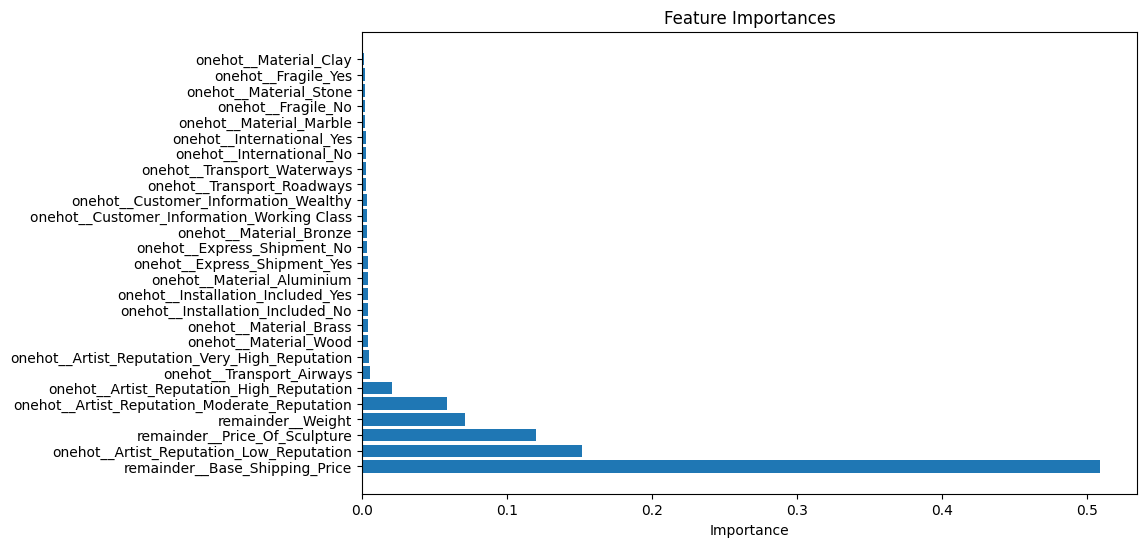

In [24]:
# Assuming you have a DataFrame 'X' with your features and 'y' with the target variable

# Create a Random Forest Regressor model
rf_model = RandomForestRegressor()

# Fit the model to your data
rf_model.fit(X_train, y_train)

# Get feature importances
feature_importances = rf_model.feature_importances_

# Create a DataFrame to display feature importances
feature_importance_df = pd.DataFrame({
    'Feature': X_train.columns,
    'Importance': feature_importances
})

# Sort the DataFrame by importance in descending order
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

# Display the feature importances
print("Feature Importances:")
print(feature_importance_df)

# Plot the feature importances if you have matplotlib installed
try:
    import matplotlib.pyplot as plt

    plt.figure(figsize=(10, 6))
    plt.barh(feature_importance_df['Feature'], feature_importance_df['Importance'])
    plt.xlabel('Importance')
    plt.title('Feature Importances')
    plt.show()
except ImportError:
    print("Matplotlib not installed. Visualization not available.")

In [27]:
import optuna
import pandas as pd
from sklearn.metrics import r2_score
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor

class OptunaRegression:
    def __init__(self, X_train, y_train, X_validation, y_validation):
        self.X_train = X_train
        self.y_train = y_train
        self.X_validation = X_validation
        self.y_validation = y_validation
        self.study_xgboost = optuna.create_study(direction='maximize')  # Change to 'maximize' for R2 score
        self.study_random_forest = optuna.create_study(direction='maximize')  # Change to 'maximize' for R2 score
        self.best_models_xgboost = []
        self.best_models_random_forest = []
        self.results_df = None

    def objective_xgboost(self, trial):
        xgboost_params = {
            'n_estimators': trial.suggest_int('n_estimators', 50, 200),
            'learning_rate': trial.suggest_loguniform('learning_rate', 0.01, 0.1),
            'max_depth': trial.suggest_int('max_depth', 3, 10),
            # Add other XGBoost hyperparameters as needed for optimization
        }

        xgboost_model = XGBRegressor(**xgboost_params)
        xgboost_model.fit(self.X_train, self.y_train)
        predictions = xgboost_model.predict(self.X_validation)
        r2 = r2_score(self.y_validation, predictions)

        return r2

    def objective_random_forest(self, trial):
        random_forest_params = {
            'n_estimators': trial.suggest_int('n_estimators', 50, 200),
            'max_depth': trial.suggest_int('max_depth', 3, 10),
            'min_samples_split': trial.suggest_int('min_samples_split', 2, 10),
            'min_samples_leaf': trial.suggest_int('min_samples_leaf', 1, 5),
            # Add other Random Forest hyperparameters as needed for optimization
        }

        rf_model = RandomForestRegressor(**random_forest_params)
        rf_model.fit(self.X_train, self.y_train)
        predictions = rf_model.predict(self.X_validation)
        r2 = r2_score(self.y_validation, predictions)

        return r2

    def run_optimization(self, n_trials=50):
        self.study_xgboost.optimize(self.objective_xgboost, n_trials=n_trials, n_jobs=-1)
        self.study_random_forest.optimize(self.objective_random_forest, n_trials=n_trials, n_jobs=-1)

        # Get the best hyperparameters and models for XGBoost
        for i in range(3):
            trial = self.study_xgboost.trials[i]
            xgboost_params = {key: trial.params[key] for key in trial.params}
            best_model = XGBRegressor(**xgboost_params)
            best_model.fit(self.X_train, self.y_train)
            self.best_models_xgboost.append((xgboost_params, best_model))

        # Get the best hyperparameters and models for Random Forest
        for i in range(3):
            trial = self.study_random_forest.trials[i]
            random_forest_params = {key: trial.params[key] for key in trial.params}
            best_model = RandomForestRegressor(**random_forest_params)
            best_model.fit(self.X_train, self.y_train)
            self.best_models_random_forest.append((random_forest_params, best_model))

        # Create a DataFrame to store the results
        self.results_df = pd.DataFrame({
            'Model': ['XGBoost', 'Random Forest'],
            'Best_Parameters': [str(self.study_xgboost.best_params), str(self.study_random_forest.best_params)],
            'Final_Optimized_Score': [self.study_xgboost.best_value, self.study_random_forest.best_value]
        })

        return self.results_df


# Assuming X_train, X_test, y_train, y_test are available
optuna_regression = OptunaRegression(X_train, y_train, X_test, y_test)
results_df = optuna_regression.run_optimization(n_trials=50)

# Print the results DataFrame
print("Results DataFrame:")
print(results_df)


[I 2023-11-16 13:31:50,119] A new study created in memory with name: no-name-4aaf9afc-813d-4292-92ef-62051ffd23ef
[I 2023-11-16 13:31:50,121] A new study created in memory with name: no-name-41a0a167-8d6c-4fc6-ab2c-ab9e744f56f7
C:\Users\Hitesh\AppData\Local\Temp\ipykernel_8640\3206131129.py:22: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.01, 0.1),
C:\Users\Hitesh\AppData\Local\Temp\ipykernel_8640\3206131129.py:22: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.01, 0.1),
[I 2023-11-16 13:31:50,617] Trial 6 finished with value: 0.5974469795542587 and 

Results DataFrame:
           Model                                    Best_Parameters  \
0        XGBoost  {'n_estimators': 187, 'learning_rate': 0.08096...   
1  Random Forest  {'n_estimators': 83, 'max_depth': 10, 'min_sam...   

   Final_Optimized_Score  
0               0.832314  
1               0.803447  


In [28]:
results_df

,Model,Best_Parameters,Final_Optimized_Score
0,XGBoost,"{'n_estimators': 187, 'learning_rate': 0.08096...",0.832314
1,Random Forest,"{'n_estimators': 83, 'max_depth': 10, 'min_sam...",0.803447


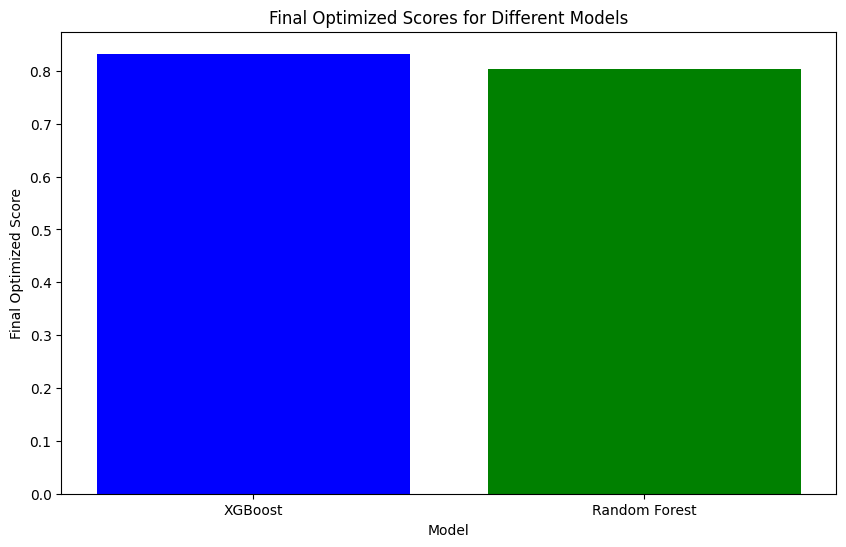

In [31]:
def plot_model_scores(results_df):
    plt.figure(figsize=(10, 6))
    plt.bar(results_df['Model'], results_df['Final_Optimized_Score'], color=['blue', 'green'])
    plt.title('Final Optimized Scores for Different Models')
    plt.xlabel('Model')
    plt.ylabel('Final Optimized Score')
    plt.show()

# Assuming results_df is the DataFrame containing the optimization results
plot_model_scores(results_df)

In [30]:
# Use the best XGBoost model for predictions
best_xgboost_model = optuna_regression.best_models_xgboost[0][1]
xgboost_predictions = best_xgboost_model.predict(X_test)

# Use the best Random Forest model for predictions
best_rf_model = optuna_regression.best_models_random_forest[0][1]
rf_predictions = best_rf_model.predict(X_test)

# Assuming you have the true y_test values for comparison
y_true = y_test

# Assuming you have log-transformed predictions
log_transformed_predictions_xgboost = best_xgboost_model.predict(X_test)  # Replace with your actual predictions
log_transformed_predictions_rf = best_rf_model.predict(X_test)  # Replace with your actual predictions

# Inverse log transformation to get back the original scale
original_predictions_xgboost = np.exp(log_transformed_predictions_xgboost)
original_predictions_rf = np.exp(log_transformed_predictions_rf)

# Compare predictions with true values
results_comparison = pd.DataFrame({
    'True_Values': y_true,
    'XGBoost_Predictions': original_predictions_xgboost,
    'RandomForest_Predictions': original_predictions_rf
})

# Print or use the comparison DataFrame as needed
print("Re-transformed Predictions Comparison:")
print(results_comparison)

Re-transformed Predictions Comparison:
      True_Values  XGBoost_Predictions  RandomForest_Predictions
2437     7.282177           437.813629                463.286504
1600     5.489062           340.940491                339.001200
351      7.007211           959.138489               1467.520458
3817     6.190828           553.652832                646.909114
4184     5.075674           320.996887                359.620390
...           ...                  ...                       ...
3788     5.423363           217.022400                177.463186
183      5.188726           267.702972                243.148938
2499     4.781641           182.818726                139.518836
1113     5.554006           270.616638                244.518740
486      6.657189           698.460205                809.917846

[631 rows x 3 columns]
